In [43]:
import numpy as np
import csv
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler, Normalizer, RobustScaler, MaxAbsScaler, PowerTransformer, QuantileTransformer
from sklearn.model_selection import train_test_split

In [60]:
df_bp =[]
df_bp = pd.read_csv('C:/Users/Kuzmins/Documents/Jupiter/VKRfinal/X_bp.csv')
df_nup =[]
df_nup = pd.read_csv('C:/Users/Kuzmins/Documents/Jupiter/VKRfinal/X_nup.csv')

In [61]:
df = df_bp.merge(df_nup, left_on = 'Unnamed: 0', right_on = 'Unnamed: 0')
df

Unnamed: 0  Sootnoshenie_Matrix_napolnitel  Plotnost_kg/m3  \
0              0                        1.857143     2030.000000   
1              1                        1.857143     2030.000000   
2              2                        1.857143     2030.000000   
3              3                        1.857143     2030.000000   
4              4                        2.771331     2030.000000   
...          ...                             ...             ...   
1018        1018                        2.271346     1952.087902   
1019        1019                        3.444022     2050.089171   
1020        1020                        3.280604     1972.372865   
1021        1021                        3.705351     2066.799773   
1022        1022                        3.808020     1890.413468   

      Modul_Uprugosti_GPa  Kolichestvo_napolnitela_m%  \
0              738.736842                   30.000000   
1              738.736842                   50.000000   
2              738.736842                   49.900000   
3              738.736842                  129.000000   
4              753.000000                  111.860000   
...                   ...                         ...   
1018           912.855545                   86.992183   
1019           444.732634                  145.981978   
1020           416.836523                  110.533477   
1021           741.475517                  141.397963   
1022           417.316232                  129.183416   

      Soderjanie_epoxidnih_grupp_%_2  Temp_vspishki_C_2  \
0                          22.267857         100.000000   
1                          23.750000         284.615385   
2                          33.000000         284.615385   
3                          21.250000         300.000000   
4                          22.267857         284.615385   
...                              ...                ...   
1018                       20.123249         324.774576   
1019                       19.599769         254.215401   
1020                       23.957502         248.423047   
1021                       19.246945         275.779840   
1022                       27.474763         300.952708   

      Poverhnostnaia_plotnost_g/m2  Modul_uprugosti_pri_rastiajenii_GPa  \
0                       210.000000                            70.000000   
1                       210.000000                            70.000000   
2                       210.000000                            70.000000   
3                       210.000000                            70.000000   
4                       210.000000                            70.000000   
...                            ...                                  ...   
1018                    209.198700                            73.090961   
1019                    350.660830                            72.920827   
1020                    740.142791                            74.734344   
1021                    641.468152                            74.042708   
1022                    758.747882                            74.309704   

      Prochnost_pri_rastiajenii_Mpa  Potreblenie_smoli_g/m2  \
0                       3000.000000              220.000000   
1                       3000.000000              220.000000   
2                       3000.000000              220.000000   
3                       3000.000000              220.000000   
4                       3000.000000              220.000000   
...                             ...                     ...   
1018                    2387.292495              125.007669   
1019                    2360.392784              117.730099   
1020                    2662.906040              236.606764   
1021                    2071.715856              197.126067   
1022                    2856.328932              194.754342   

      Ugol_nashivki_grad  Shag_nashivki  Plotnost_nashivki  
0                      0       4.000000          57.000000  
1              

In [62]:
df.drop(['Unnamed: 0'], inplace=True, axis=1)
# Пропуски
df.isnull().values.any()

False

Sootnoshenie_Matrix_napolnitel


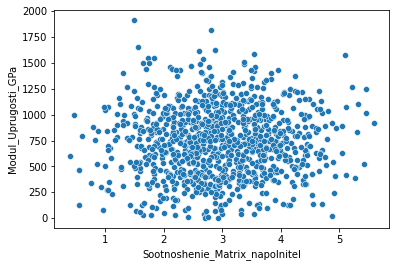

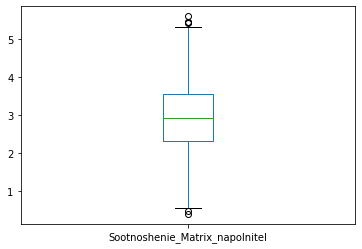




Plotnost_kg/m3


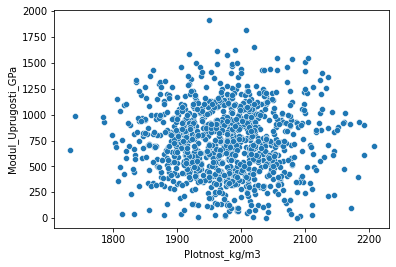

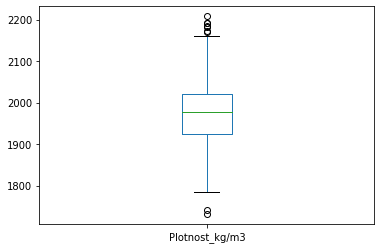




Modul_Uprugosti_GPa


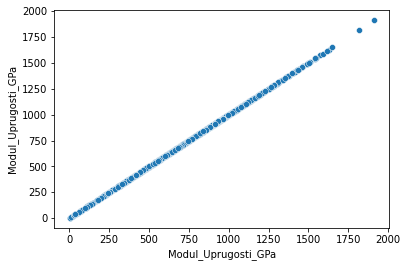

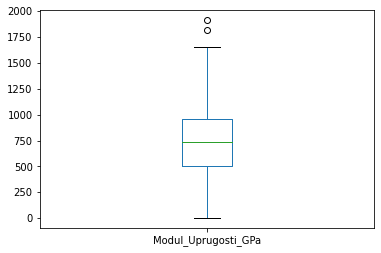




Kolichestvo_napolnitela_m%


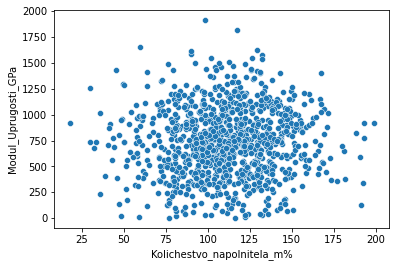

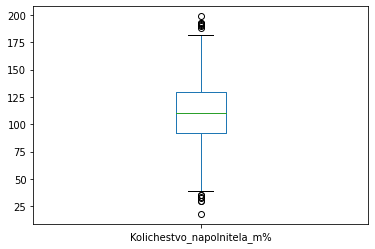




Soderjanie_epoxidnih_grupp_%_2


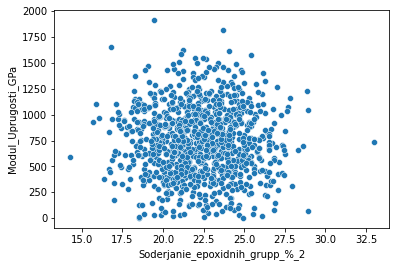

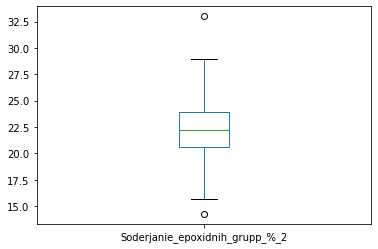




Temp_vspishki_C_2


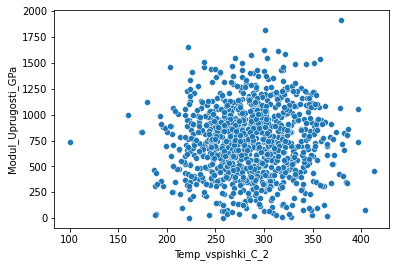

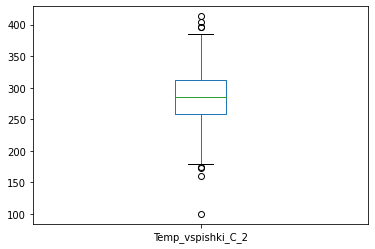




Poverhnostnaia_plotnost_g/m2


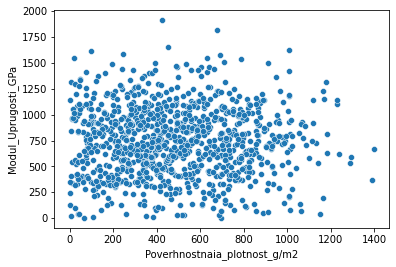

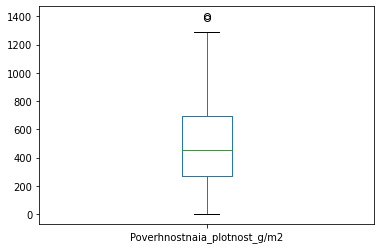




Modul_uprugosti_pri_rastiajenii_GPa


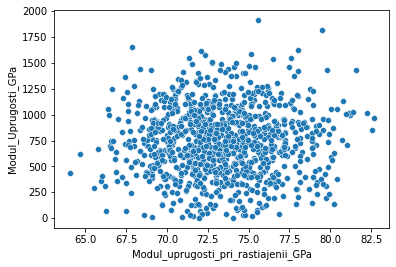

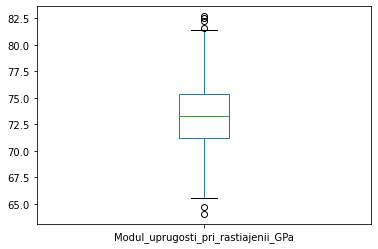




Prochnost_pri_rastiajenii_Mpa


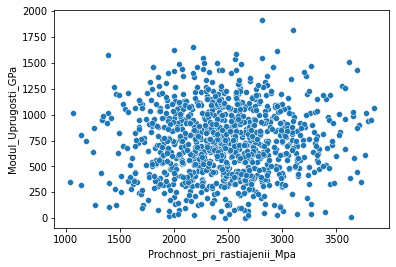

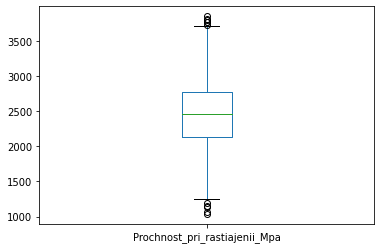




Potreblenie_smoli_g/m2


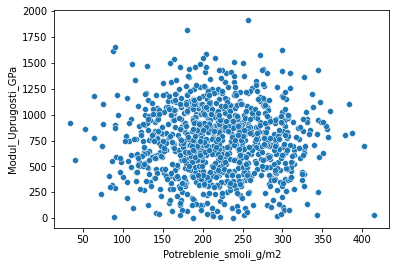

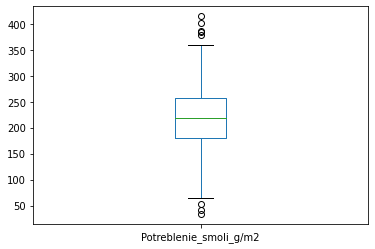




Ugol_nashivki_grad


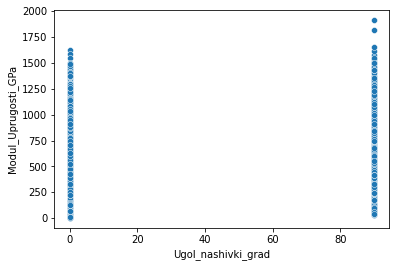

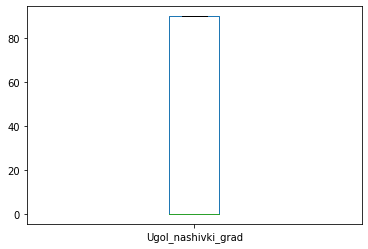




Shag_nashivki


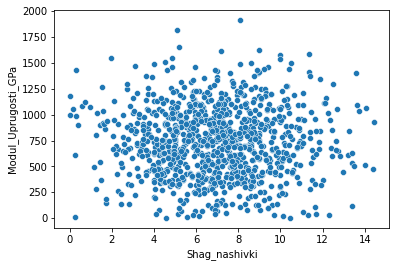

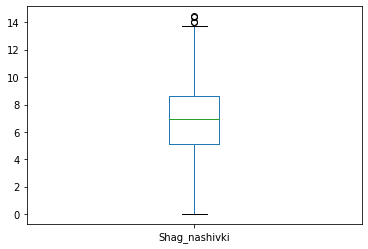




Plotnost_nashivki


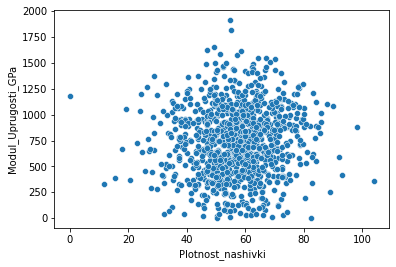

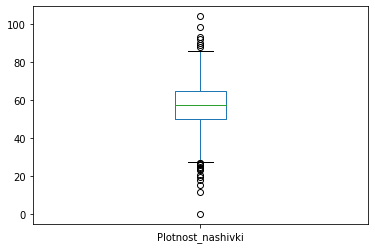

In [63]:
for column in df:
    print(column)
    sns.scatterplot(x = column , y = "Modul_Uprugosti_GPa", data = df);
    plt.show()
    df.boxplot(column = column, grid = False)
    plt.show()
    print('\n\n')
    

In [ ]:
sns.pairplot(df)
plt.savefig('matrix1.png')

In [ ]:
sns.heatmap(df)

In [64]:
df.describe()

Sootnoshenie_Matrix_napolnitel  Plotnost_kg/m3  Modul_Uprugosti_GPa  \
count                     1023.000000     1023.000000          1023.000000   
mean                         2.930366     1975.734888           739.923233   
std                          0.913222       73.729231           330.231581   
min                          0.389403     1731.764635             2.436909   
25%                          2.317887     1924.155466           500.047452   
50%                          2.906878     1977.621657           739.664328   
75%                          3.552660     2021.374374           961.812526   
max                          5.591742     2207.773481          1911.536477   

       Kolichestvo_napolnitela_m%  Soderjanie_epoxidnih_grupp_%_2  \
count                 1023.000000                     1023.000000   
mean                   110.570769                       22.244390   
std                     28.295911                        2.406301   
min                     17.740275                       14.254986   
25%                     92.443497                       20.608034   
50%                    110.564840                       22.230744   
75%                    129.730366                       23.961934   
max                    198.953207                       33.000000   

       Temp_vspishki_C_2  Poverhnostnaia_plotnost_g/m2  \
count        1023.000000                   1023.000000   
mean          285.882151                    482.731833   
std            40.943260                    281.314690   
min           100.000000                      0.603740   
25%           259.066528                    266.816645   
50%           285.896812                    451.864365   
75%           313.002105                    693.225017   
max           413.273418                   1399.542362   

       Modul_uprugosti_pri_rastiajenii_GPa  Prochnost_pri_rastiajenii_Mpa  \
count                          1023.000000                    1023.000000   
mean                             73.328571                    2466.922843   
std                               3.118983                     485.628006   
min                              64.054061                    1036.856605   
25%                              71.245018                    2135.850448   
50%                              73.268805                    2459.524526   
75%                              75.356612                    2767.193119   
max                              82.682051                    3848.436732   

       Potreblenie_smoli_g/m2  Ugol_nashivki_grad  Shag_nashivki  \
count             1023.000000         1023.000000    1023.000000   
mean               218.423144           44.252199       6.899222   
std                 59.735931           45.015793       2.563467   
min                 33.803026            0.000000       0.000000   
25%                179.627520            0.000000       5.080033   
50%                219.198882            0.000000       6.916144   
75%                257.481724           90.000000       8.586293   
max                414.590628           90.000000      14.440522   

       Plotnost_nashivki  
count        1023.000000  
mean           57.153929  
std            12.350969  
min             0.000000  
25%            49.799212  
50%            57.341920  
75%            64.944961  
max           103.988901

In [65]:
dfp = df.copy(deep = True)

In [66]:
#Remove outliers
for x in dfp:
    q75,q25 = np.percentile(dfp.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    dfp.loc[dfp[x] < min,x] = np.nan
    dfp.loc[dfp[x] > max,x] = np.nan
dfp.head()

Sootnoshenie_Matrix_napolnitel  Plotnost_kg/m3  Modul_Uprugosti_GPa  \
0                        1.857143          2030.0           738.736842   
1                        1.857143          2030.0           738.736842   
2                        1.857143          2030.0           738.736842   
3                        1.857143          2030.0           738.736842   
4                        2.771331          2030.0           753.000000   

   Kolichestvo_napolnitela_m%  Soderjanie_epoxidnih_grupp_%_2  \
0                         NaN                       22.267857   
1                       50.00                       23.750000   
2                       49.90                             NaN   
3                      129.00                       21.250000   
4                      111.86                       22.267857   

   Temp_vspishki_C_2  Poverhnostnaia_plotnost_g/m2  \
0                NaN                         210.0   
1         284.615385                         210.0   
2         284.615385                         210.0   
3         300.000000                         210.0   
4         284.615385                         210.0   

   Modul_uprugosti_pri_rastiajenii_GPa  Prochnost_pri_rastiajenii_Mpa  \
0                                 70.0                         3000.0   
1                                 70.0                         3000.0   
2                                 70.0                         3000.0   
3                                 70.0                         3000.0   
4                                 70.0                         3000.0   

   Potreblenie_smoli_g/m2  Ugol_nashivki_grad  Shag_nashivki  \
0                   220.0                 0.0            4.0   
1                   220.0                 0.0            4.0   
2                   220.0                 0.0            4.0   
3                   220.0                 0.0            5.0   
4                   220.0                 0.0            5.0   

   Plotnost_nashivki  
0               57.0  
1               60.0  
2               70.0  
3               47.0  
4               57.0

In [67]:
dfp.isnull().sum()

Sootnoshenie_Matrix_napolnitel          6
Plotnost_kg/m3                          9
Modul_Uprugosti_GPa                     2
Kolichestvo_napolnitela_m%             14
Soderjanie_epoxidnih_grupp_%_2          2
Temp_vspishki_C_2                       8
Poverhnostnaia_plotnost_g/m2            2
Modul_uprugosti_pri_rastiajenii_GPa     6
Prochnost_pri_rastiajenii_Mpa          11
Potreblenie_smoli_g/m2                  8
Ugol_nashivki_grad                      0
Shag_nashivki                           4
Plotnost_nashivki                      21
dtype: int64

In [68]:
#Так как количество незначительное, решаем удалить данные
dfp = dfp.dropna(axis = 0)
dfp

Sootnoshenie_Matrix_napolnitel  Plotnost_kg/m3  Modul_Uprugosti_GPa  \
1                           1.857143     2030.000000           738.736842   
3                           1.857143     2030.000000           738.736842   
4                           2.771331     2030.000000           753.000000   
5                           2.767918     2000.000000           748.000000   
6                           2.569620     1910.000000           807.000000   
...                              ...             ...                  ...   
1018                        2.271346     1952.087902           912.855545   
1019                        3.444022     2050.089171           444.732634   
1020                        3.280604     1972.372865           416.836523   
1021                        3.705351     2066.799773           741.475517   
1022                        3.808020     1890.413468           417.316232   

      Kolichestvo_napolnitela_m%  Soderjanie_epoxidnih_grupp_%_2  \
1                      50.000000                       23.750000   
3                     129.000000                       21.250000   
4                     111.860000                       22.267857   
5                     111.860000                       22.267857   
6                     111.860000                       22.267857   
...                          ...                             ...   
1018                   86.992183                       20.123249   
1019                  145.981978                       19.599769   
1020                  110.533477                       23.957502   
1021                  141.397963                       19.246945   
1022                  129.183416                       27.474763   

      Temp_vspishki_C_2  Poverhnostnaia_plotnost_g/m2  \
1            284.615385                    210.000000   
3            300.000000                    210.000000   
4            284.615385                    210.000000   
5            284.615385                    210.000000   
6            284.615385                    210.000000   
...                 ...                           ...   
1018         324.774576                    209.198700   
1019         254.215401                    350.660830   
1020         248.423047                    740.142791   
1021         275.779840                    641.468152   
1022         300.952708                    758.747882   

      Modul_uprugosti_pri_rastiajenii_GPa  Prochnost_pri_rastiajenii_Mpa  \
1                               70.000000                    3000.000000   
3                               70.000000                    3000.000000   
4                               70.000000                    3000.000000   
5                               70.000000                    3000.000000   
6                               70.000000                    3000.000000   
...                                   ...                            ...   
1018                            73.090961                    2387.292495   
1019                            72.920827                    2360.392784   
1020                            74.734344                    2662.906040   
1021                            74.042708                    2071.715856   
1022                            74.309704                    2856.328932   

      Potreblenie_smoli_g/m2  Ugol_nashivki_grad  Shag_nashivki  \
1                 220.000000                 0.0       4.000000   
3                 220.000000                 0.0       5.000000   
4                 220.000000                 0.0       5.000000   
5                 220.000000                 0.0       5.000000   
6                 220.000000                 0.0       5.000000   
...                      ...                 ...            ...   
1018              125.007669                90.0       9.076380   
1019              117.730099                90.0      10.565614   
1020              236.606764                90.0       4.161154

In [69]:
#Анализ данных без выбросов
dfp.describe()

Sootnoshenie_Matrix_napolnitel  Plotnost_kg/m3  Modul_Uprugosti_GPa  \
count                      936.000000      936.000000           936.000000   
mean                         2.925683     1974.040023           738.247627   
std                          0.893712       70.808120           328.708665   
min                          0.547391     1784.482245             2.436909   
25%                          2.321931     1923.443747           498.577158   
50%                          2.904731     1977.258043           738.736842   
75%                          3.546650     2020.158764           958.418993   
max                          5.314144     2161.565216          1649.415706   

       Kolichestvo_napolnitela_m%  Soderjanie_epoxidnih_grupp_%_2  \
count                  936.000000                      936.000000   
mean                   110.916216                       22.209030   
std                     27.037891                        2.394871   
min                     38.668500                       15.695894   
25%                     92.523816                       20.571516   
50%                    111.113175                       22.184713   
75%                    130.001450                       23.961818   
max                    181.828448                       28.955094   

       Temp_vspishki_C_2  Poverhnostnaia_plotnost_g/m2  \
count         936.000000                    936.000000   
mean          286.040414                    482.993901   
std            39.400677                    280.190377   
min           179.374391                      0.603740   
25%           259.184486                    266.004099   
50%           286.024118                    457.732246   
75%           312.991425                    695.900862   
max           386.067992                   1291.340115   

       Modul_uprugosti_pri_rastiajenii_GPa  Prochnost_pri_rastiajenii_Mpa  \
count                           936.000000                     936.000000   
mean                             73.305127                    2467.488822   
std                               3.037381                     463.838911   
min                              65.553336                    1250.392802   
25%                              71.248823                    2146.936034   
50%                              73.259230                    2457.959767   
75%                              75.310788                    2755.169485   
max                              81.417126                    3705.672523   

       Potreblenie_smoli_g/m2  Ugol_nashivki_grad  Shag_nashivki  \
count              936.000000          936.000000     936.000000   
mean               217.613374           46.057692       6.915585   
std                 57.827255           45.011619       2.509672   
min                 63.685698            0.000000       0.037639   
25%                179.489091            0.000000       5.134988   
50%                218.388715           90.000000       6.943337   
75%                256.396777           90.000000       8.591450   
max                359.052220           90.000000      13.732404   

       Plotnost_nashivki  
count         936.000000  
mean           57.451895  
std            11.239331  
min            27.272928  
25%            50.209656  
50%            57.584225  
75%            64.798211  
max            86.012427

Sootnoshenie_Matrix_napolnitel


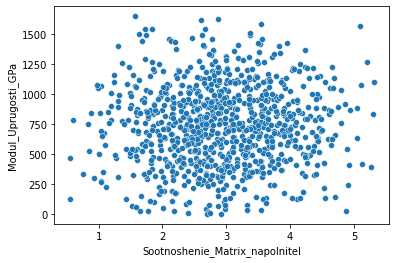

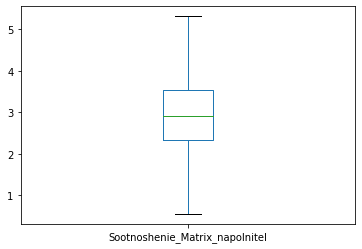




Plotnost_kg/m3


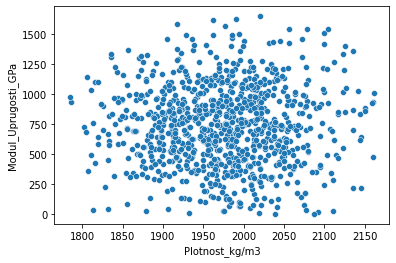

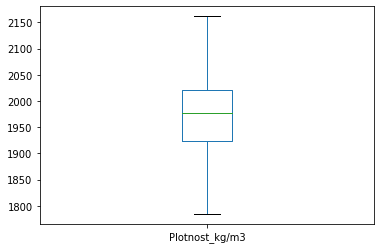




Modul_Uprugosti_GPa


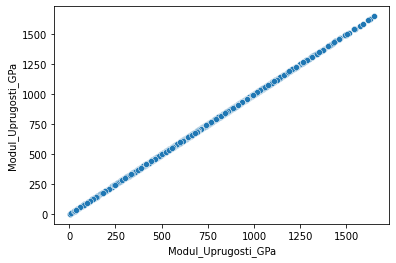

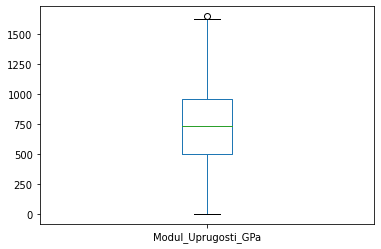




Kolichestvo_napolnitela_m%


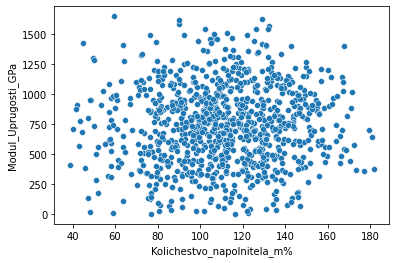

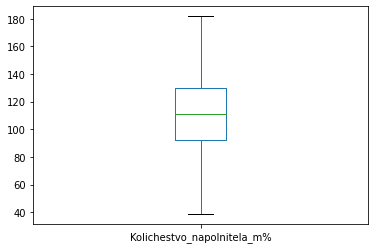




Soderjanie_epoxidnih_grupp_%_2


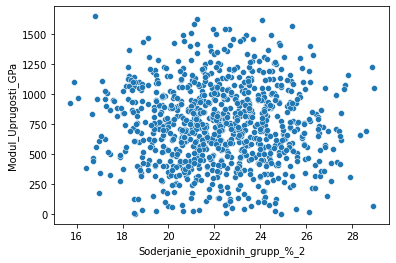

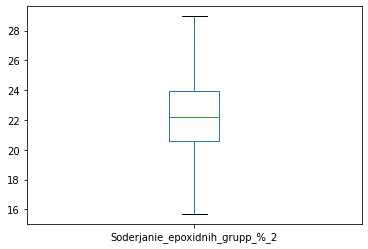




Temp_vspishki_C_2


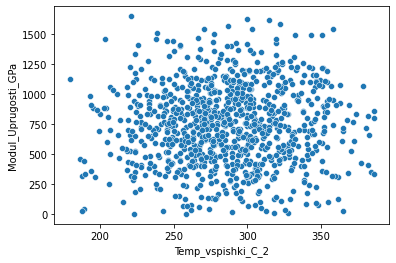

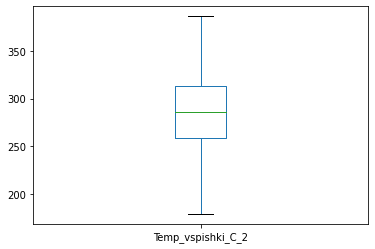




Poverhnostnaia_plotnost_g/m2


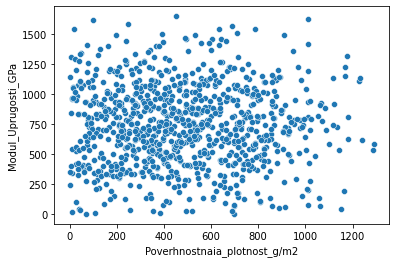

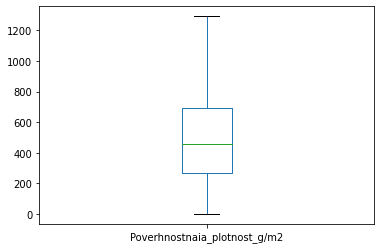




Modul_uprugosti_pri_rastiajenii_GPa


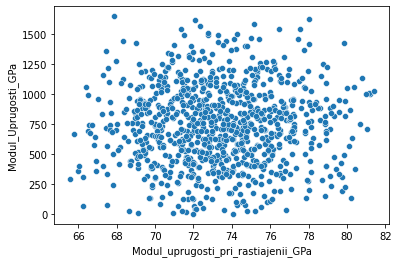

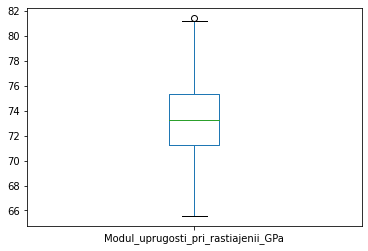




Prochnost_pri_rastiajenii_Mpa


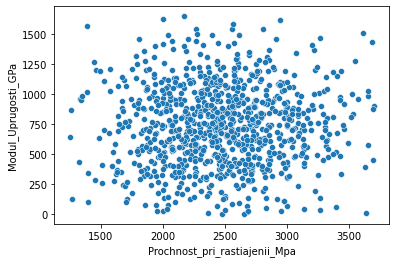

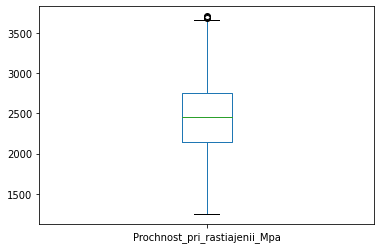




Potreblenie_smoli_g/m2


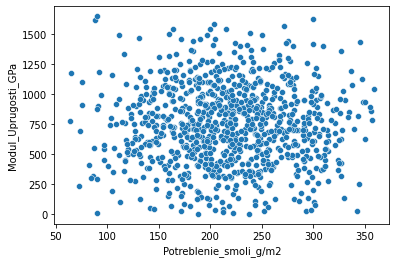

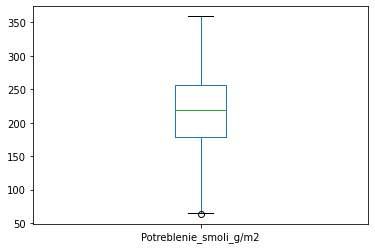




Ugol_nashivki_grad


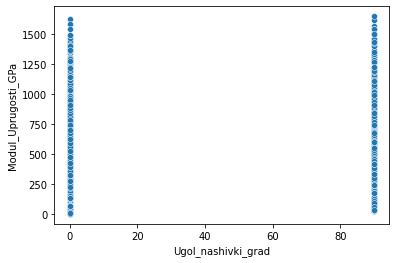

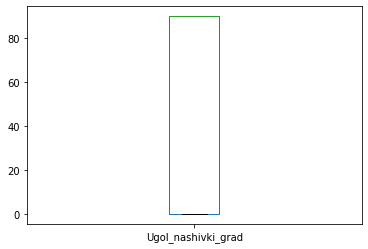




Shag_nashivki


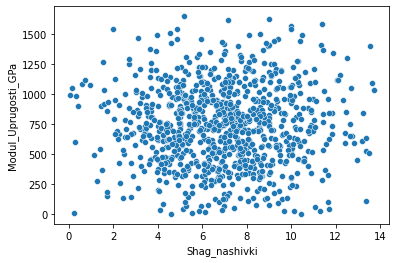

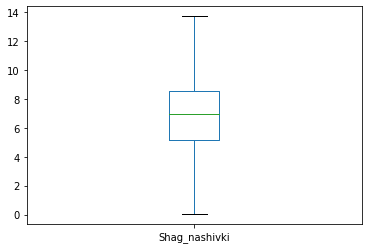




Plotnost_nashivki


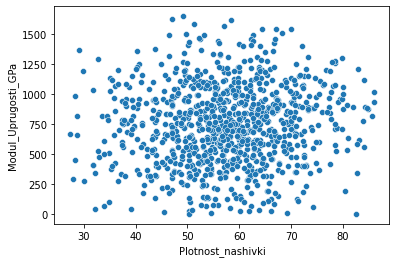

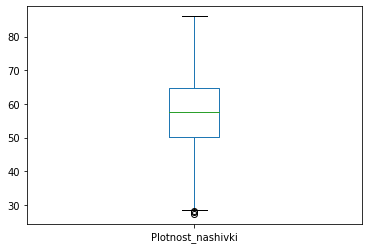

In [70]:
for column in dfp:
    print(column)
    sns.scatterplot(x = column , y = "Modul_Uprugosti_GPa", data = dfp);
    plt.show()
    dfp.boxplot(column = column, grid = False)
    plt.show()
    print('\n\n')

In [81]:
dfp2 = dfp.copy(deep = True)
dfp2.describe()

Sootnoshenie_Matrix_napolnitel  Plotnost_kg/m3  Modul_Uprugosti_GPa  \
count                      936.000000      936.000000           936.000000   
mean                         2.925683     1974.040023           738.247627   
std                          0.893712       70.808120           328.708665   
min                          0.547391     1784.482245             2.436909   
25%                          2.321931     1923.443747           498.577158   
50%                          2.904731     1977.258043           738.736842   
75%                          3.546650     2020.158764           958.418993   
max                          5.314144     2161.565216          1649.415706   

       Kolichestvo_napolnitela_m%  Soderjanie_epoxidnih_grupp_%_2  \
count                  936.000000                      936.000000   
mean                   110.916216                       22.209030   
std                     27.037891                        2.394871   
min                     38.668500                       15.695894   
25%                     92.523816                       20.571516   
50%                    111.113175                       22.184713   
75%                    130.001450                       23.961818   
max                    181.828448                       28.955094   

       Temp_vspishki_C_2  Poverhnostnaia_plotnost_g/m2  \
count         936.000000                    936.000000   
mean          286.040414                    482.993901   
std            39.400677                    280.190377   
min           179.374391                      0.603740   
25%           259.184486                    266.004099   
50%           286.024118                    457.732246   
75%           312.991425                    695.900862   
max           386.067992                   1291.340115   

       Modul_uprugosti_pri_rastiajenii_GPa  Prochnost_pri_rastiajenii_Mpa  \
count                           936.000000                     936.000000   
mean                             73.305127                    2467.488822   
std                               3.037381                     463.838911   
min                              65.553336                    1250.392802   
25%                              71.248823                    2146.936034   
50%                              73.259230                    2457.959767   
75%                              75.310788                    2755.169485   
max                              81.417126                    3705.672523   

       Potreblenie_smoli_g/m2  Ugol_nashivki_grad  Shag_nashivki  \
count              936.000000          936.000000     936.000000   
mean               217.613374           46.057692       6.915585   
std                 57.827255           45.011619       2.509672   
min                 63.685698            0.000000       0.037639   
25%                179.489091            0.000000       5.134988   
50%                218.388715           90.000000       6.943337   
75%                256.396777           90.000000       8.591450   
max                359.052220           90.000000      13.732404   

       Plotnost_nashivki  
count         936.000000  
mean           57.451895  
std            11.239331  
min            27.272928  
25%            50.209656  
50%            57.584225  
75%            64.798211  
max            86.012427

In [93]:
dfp2.reset_index(inplace=True)
dfp2

index  Sootnoshenie_Matrix_napolnitel  Plotnost_kg/m3  \
0        1                        1.857143     2030.000000   
1        3                        1.857143     2030.000000   
2        4                        2.771331     2030.000000   
3        5                        2.767918     2000.000000   
4        6                        2.569620     1910.000000   
..     ...                             ...             ...   
931   1018                        2.271346     1952.087902   
932   1019                        3.444022     2050.089171   
933   1020                        3.280604     1972.372865   
934   1021                        3.705351     2066.799773   
935   1022                        3.808020     1890.413468   

     Modul_Uprugosti_GPa  Kolichestvo_napolnitela_m%  \
0             738.736842                   50.000000   
1             738.736842                  129.000000   
2             753.000000                  111.860000   
3             748.000000                  111.860000   
4             807.000000                  111.860000   
..                   ...                         ...   
931           912.855545                   86.992183   
932           444.732634                  145.981978   
933           416.836523                  110.533477   
934           741.475517                  141.397963   
935           417.316232                  129.183416   

     Soderjanie_epoxidnih_grupp_%_2  Temp_vspishki_C_2  \
0                         23.750000         284.615385   
1                         21.250000         300.000000   
2                         22.267857         284.615385   
3                         22.267857         284.615385   
4                         22.267857         284.615385   
..                              ...                ...   
931                       20.123249         324.774576   
932                       19.599769         254.215401   
933                       23.957502         248.423047   
934                       19.246945         275.779840   
935                       27.474763         300.952708   

     Poverhnostnaia_plotnost_g/m2  Modul_uprugosti_pri_rastiajenii_GPa  \
0                      210.000000                            70.000000   
1                      210.000000                            70.000000   
2                      210.000000                            70.000000   
3                      210.000000                            70.000000   
4                      210.000000                            70.000000   
..                            ...                                  ...   
931                    209.198700                            73.090961   
932                    350.660830                            72.920827   
933                    740.142791                            74.734344   
934                    641.468152                            74.042708   
935                    758.747882                            74.309704   

     Prochnost_pri_rastiajenii_Mpa  Potreblenie_smoli_g/m2  \
0                      3000.000000              220.000000   
1                      3000.000000              220.000000   
2                      3000.000000              220.000000   
3                      3000.000000              220.000000   
4                      3000.000000              220.000000   
..                             ...                     ...   
931                    2387.292495              125.007669   
932                    2360.392784              117.730099   
933                    2662.906040              236.606764   
934                    2071.715856              197.126067   
935                    2856.328932              194.754342   

     Ugol_nashivki_grad  Shag_nashivki  Plotnost_nashivki  
0                   0.0       4.000000          60.000000  
1                   0.0       5.000000          47.000000  
2                   0.0       5.000000          57.000000  
3               

In [94]:
dfp2.drop(['index'], inplace=True, axis=1)

In [95]:
dfp2

Sootnoshenie_Matrix_napolnitel  Plotnost_kg/m3  Modul_Uprugosti_GPa  \
0                          1.857143     2030.000000           738.736842   
1                          1.857143     2030.000000           738.736842   
2                          2.771331     2030.000000           753.000000   
3                          2.767918     2000.000000           748.000000   
4                          2.569620     1910.000000           807.000000   
..                              ...             ...                  ...   
931                        2.271346     1952.087902           912.855545   
932                        3.444022     2050.089171           444.732634   
933                        3.280604     1972.372865           416.836523   
934                        3.705351     2066.799773           741.475517   
935                        3.808020     1890.413468           417.316232   

     Kolichestvo_napolnitela_m%  Soderjanie_epoxidnih_grupp_%_2  \
0                     50.000000                       23.750000   
1                    129.000000                       21.250000   
2                    111.860000                       22.267857   
3                    111.860000                       22.267857   
4                    111.860000                       22.267857   
..                          ...                             ...   
931                   86.992183                       20.123249   
932                  145.981978                       19.599769   
933                  110.533477                       23.957502   
934                  141.397963                       19.246945   
935                  129.183416                       27.474763   

     Temp_vspishki_C_2  Poverhnostnaia_plotnost_g/m2  \
0           284.615385                    210.000000   
1           300.000000                    210.000000   
2           284.615385                    210.000000   
3           284.615385                    210.000000   
4           284.615385                    210.000000   
..                 ...                           ...   
931         324.774576                    209.198700   
932         254.215401                    350.660830   
933         248.423047                    740.142791   
934         275.779840                    641.468152   
935         300.952708                    758.747882   

     Modul_uprugosti_pri_rastiajenii_GPa  Prochnost_pri_rastiajenii_Mpa  \
0                              70.000000                    3000.000000   
1                              70.000000                    3000.000000   
2                              70.000000                    3000.000000   
3                              70.000000                    3000.000000   
4                              70.000000                    3000.000000   
..                                   ...                            ...   
931                            73.090961                    2387.292495   
932                            72.920827                    2360.392784   
933                            74.734344                    2662.906040   
934                            74.042708                    2071.715856   
935                            74.309704                    2856.328932   

     Potreblenie_smoli_g/m2  Ugol_nashivki_grad  Shag_nashivki  \
0                220.000000                 0.0       4.000000   
1                220.000000                 0.0       5.000000   
2                220.000000                 0.0       5.000000   
3                220.000000                 0.0       5.000000   
4                220.000000                 0.0       5.000000   
..                      ...                 ...            ...   
931              125.007669                90.0       9.076380   
932              117.730099                90.0      10.565614   
933              236.606764                90.0       4.161154   
934              197.126067                90.0      

In [96]:
#Нормализация

scaler = Normalizer()
inputcol = ['Plotnost_kg/m3', 'Modul_Uprugosti_GPa', 'Kolichestvo_napolnitela_m%', 'Soderjanie_epoxidnih_grupp_%_2', 
            'Temp_vspishki_C_2', 'Poverhnostnaia_plotnost_g/m2', 'Potreblenie_smoli_g/m2', 'Ugol_nashivki_grad', 
            'Shag_nashivki', 'Plotnost_nashivki']
result = ['Sootnoshenie_Matrix_napolnitel']
col = dfp[inputcol].columns
processed = scaler.fit_transform(dfp[inputcol])
dfpm = pd.DataFrame(processed, columns = col)
dfpm

Plotnost_kg/m3  Modul_Uprugosti_GPa  Kolichestvo_napolnitela_m%  \
0          0.922078             0.335553                    0.022711   
1          0.920026             0.334807                    0.058465   
2          0.919155             0.340948                    0.050649   
3          0.917697             0.343219                    0.051327   
4          0.901306             0.380813                    0.052785   
..              ...                  ...                         ...   
931        0.888489             0.415485                    0.039594   
932        0.952254             0.206576                    0.067808   
933        0.904511             0.191157                    0.050690   
934        0.891082             0.319681                    0.060962   
935        0.892779             0.197084                    0.061009   

     Soderjanie_epoxidnih_grupp_%_2  Temp_vspishki_C_2  \
0                          0.010788           0.129280   
1                          0.009631           0.135964   
2                          0.010083           0.128870   
3                          0.010218           0.130595   
4                          0.010508           0.134307   
..                              ...                ...   
931                        0.009159           0.147821   
932                        0.009104           0.118081   
933                        0.010987           0.113924   
934                        0.008298           0.118900   
935                        0.012975           0.142130   

     Poverhnostnaia_plotnost_g/m2  Potreblenie_smoli_g/m2  Ugol_nashivki_grad  \
0                        0.095387                0.099930            0.000000   
1                        0.095175                0.099707            0.000000   
2                        0.095085                0.099613            0.000000   
3                        0.096358                0.100947            0.000000   
4                        0.099096                0.103815            0.000000   
..                            ...                     ...                 ...   
931                      0.095216                0.056897            0.040963   
932                      0.162880                0.054685            0.041804   
933                      0.339422                0.108506            0.041273   
934                      0.276563                0.084989            0.038803   
935                      0.358331                0.091976            0.042504   

     Shag_nashivki  Plotnost_nashivki  
0         0.001817           0.027254  
1         0.002266           0.021301  
2         0.002264           0.025809  
3         0.002294           0.027531  
4         0.002359           0.033032  
..             ...                ...  
931       0.004131           0.021401  
932       0.004908           0.024967  
933       0.001908           0.031014  
934       0.002722           0.025119  
935       0.002871           0.036570  

[936 rows x 10 columns]

In [97]:
dfp2

Sootnoshenie_Matrix_napolnitel  Plotnost_kg/m3  Modul_Uprugosti_GPa  \
0                          1.857143     2030.000000           738.736842   
1                          1.857143     2030.000000           738.736842   
2                          2.771331     2030.000000           753.000000   
3                          2.767918     2000.000000           748.000000   
4                          2.569620     1910.000000           807.000000   
..                              ...             ...                  ...   
931                        2.271346     1952.087902           912.855545   
932                        3.444022     2050.089171           444.732634   
933                        3.280604     1972.372865           416.836523   
934                        3.705351     2066.799773           741.475517   
935                        3.808020     1890.413468           417.316232   

     Kolichestvo_napolnitela_m%  Soderjanie_epoxidnih_grupp_%_2  \
0                     50.000000                       23.750000   
1                    129.000000                       21.250000   
2                    111.860000                       22.267857   
3                    111.860000                       22.267857   
4                    111.860000                       22.267857   
..                          ...                             ...   
931                   86.992183                       20.123249   
932                  145.981978                       19.599769   
933                  110.533477                       23.957502   
934                  141.397963                       19.246945   
935                  129.183416                       27.474763   

     Temp_vspishki_C_2  Poverhnostnaia_plotnost_g/m2  \
0           284.615385                    210.000000   
1           300.000000                    210.000000   
2           284.615385                    210.000000   
3           284.615385                    210.000000   
4           284.615385                    210.000000   
..                 ...                           ...   
931         324.774576                    209.198700   
932         254.215401                    350.660830   
933         248.423047                    740.142791   
934         275.779840                    641.468152   
935         300.952708                    758.747882   

     Modul_uprugosti_pri_rastiajenii_GPa  Prochnost_pri_rastiajenii_Mpa  \
0                              70.000000                    3000.000000   
1                              70.000000                    3000.000000   
2                              70.000000                    3000.000000   
3                              70.000000                    3000.000000   
4                              70.000000                    3000.000000   
..                                   ...                            ...   
931                            73.090961                    2387.292495   
932                            72.920827                    2360.392784   
933                            74.734344                    2662.906040   
934                            74.042708                    2071.715856   
935                            74.309704                    2856.328932   

     Potreblenie_smoli_g/m2  Ugol_nashivki_grad  Shag_nashivki  \
0                220.000000                 0.0       4.000000   
1                220.000000                 0.0       5.000000   
2                220.000000                 0.0       5.000000   
3                220.000000                 0.0       5.000000   
4                220.000000                 0.0       5.000000   
..                      ...                 ...            ...   
931              125.007669                90.0       9.076380   
932              117.730099                90.0      10.565614   
933              236.606764                90.0       4.161154   
934              197.126067                90.0      

In [98]:
dfp2.update(dfpm)
dfp2

Sootnoshenie_Matrix_napolnitel  Plotnost_kg/m3  Modul_Uprugosti_GPa  \
0                          1.857143        0.922078             0.335553   
1                          1.857143        0.920026             0.334807   
2                          2.771331        0.919155             0.340948   
3                          2.767918        0.917697             0.343219   
4                          2.569620        0.901306             0.380813   
..                              ...             ...                  ...   
931                        2.271346        0.888489             0.415485   
932                        3.444022        0.952254             0.206576   
933                        3.280604        0.904511             0.191157   
934                        3.705351        0.891082             0.319681   
935                        3.808020        0.892779             0.197084   

     Kolichestvo_napolnitela_m%  Soderjanie_epoxidnih_grupp_%_2  \
0                      0.022711                        0.010788   
1                      0.058465                        0.009631   
2                      0.050649                        0.010083   
3                      0.051327                        0.010218   
4                      0.052785                        0.010508   
..                          ...                             ...   
931                    0.039594                        0.009159   
932                    0.067808                        0.009104   
933                    0.050690                        0.010987   
934                    0.060962                        0.008298   
935                    0.061009                        0.012975   

     Temp_vspishki_C_2  Poverhnostnaia_plotnost_g/m2  \
0             0.129280                      0.095387   
1             0.135964                      0.095175   
2             0.128870                      0.095085   
3             0.130595                      0.096358   
4             0.134307                      0.099096   
..                 ...                           ...   
931           0.147821                      0.095216   
932           0.118081                      0.162880   
933           0.113924                      0.339422   
934           0.118900                      0.276563   
935           0.142130                      0.358331   

     Modul_uprugosti_pri_rastiajenii_GPa  Prochnost_pri_rastiajenii_Mpa  \
0                              70.000000                    3000.000000   
1                              70.000000                    3000.000000   
2                              70.000000                    3000.000000   
3                              70.000000                    3000.000000   
4                              70.000000                    3000.000000   
..                                   ...                            ...   
931                            73.090961                    2387.292495   
932                            72.920827                    2360.392784   
933                            74.734344                    2662.906040   
934                            74.042708                    2071.715856   
935                            74.309704                    2856.328932   

     Potreblenie_smoli_g/m2  Ugol_nashivki_grad  Shag_nashivki  \
0                  0.099930            0.000000       0.001817   
1                  0.099707            0.000000       0.002266   
2                  0.099613            0.000000       0.002264   
3                  0.100947            0.000000       0.002294   
4                  0.103815            0.000000       0.002359   
..                      ...                 ...            ...   
931                0.056897            0.040963       0.004131   
932                0.054685            0.041804       0.004908   
933                0.108506            0.041273       0.001908   
934                0.084989            0.038803      

In [100]:
dfp2.describe()

Sootnoshenie_Matrix_napolnitel  Plotnost_kg/m3  Modul_Uprugosti_GPa  \
count                      936.000000      936.000000           936.000000   
mean                         2.925683        0.885630             0.324639   
std                          0.893712        0.050507             0.130662   
min                          0.547391        0.711169             0.001118   
25%                          2.321931        0.853371             0.233777   
50%                          2.904731        0.889241             0.332429   
75%                          3.546650        0.925053             0.419727   
max                          5.314144        0.984963             0.628900   

       Kolichestvo_napolnitela_m%  Soderjanie_epoxidnih_grupp_%_2  \
count                  936.000000                      936.000000   
mean                     0.049798                        0.009976   
std                      0.012550                        0.001266   
min                      0.017381                        0.006121   
25%                      0.041488                        0.009104   
50%                      0.049615                        0.009937   
75%                      0.058947                        0.010860   
max                      0.093485                        0.014225   

       Temp_vspishki_C_2  Poverhnostnaia_plotnost_g/m2  \
count         936.000000                    936.000000   
mean            0.128399                      0.213122   
std             0.019126                      0.117799   
min             0.074918                      0.000300   
25%             0.115434                      0.121128   
50%             0.128241                      0.208118   
75%             0.141020                      0.306791   
max             0.188308                      0.527767   

       Modul_uprugosti_pri_rastiajenii_GPa  Prochnost_pri_rastiajenii_Mpa  \
count                           936.000000                     936.000000   
mean                             73.305127                    2467.488822   
std                               3.037381                     463.838911   
min                              65.553336                    1250.392802   
25%                              71.248823                    2146.936034   
50%                              73.259230                    2457.959767   
75%                              75.310788                    2755.169485   
max                              81.417126                    3705.672523   

       Potreblenie_smoli_g/m2  Ugol_nashivki_grad  Shag_nashivki  \
count              936.000000          936.000000     936.000000   
mean                 0.097682            0.020709       0.003105   
std                  0.026619            0.020327       0.001142   
min                  0.026554            0.000000       0.000016   
25%                  0.080043            0.000000       0.002330   
50%                  0.096993            0.034820       0.003118   
75%                  0.115700            0.040645       0.003843   
max                  0.169124            0.048575       0.006480   

       Plotnost_nashivki  
count         936.000000  
mean            0.025783  
std             0.005215  
min             0.011893  
25%             0.022400  
50%             0.025704  
75%             0.029310  
max             0.040841

In [102]:
dfpm = dfp2

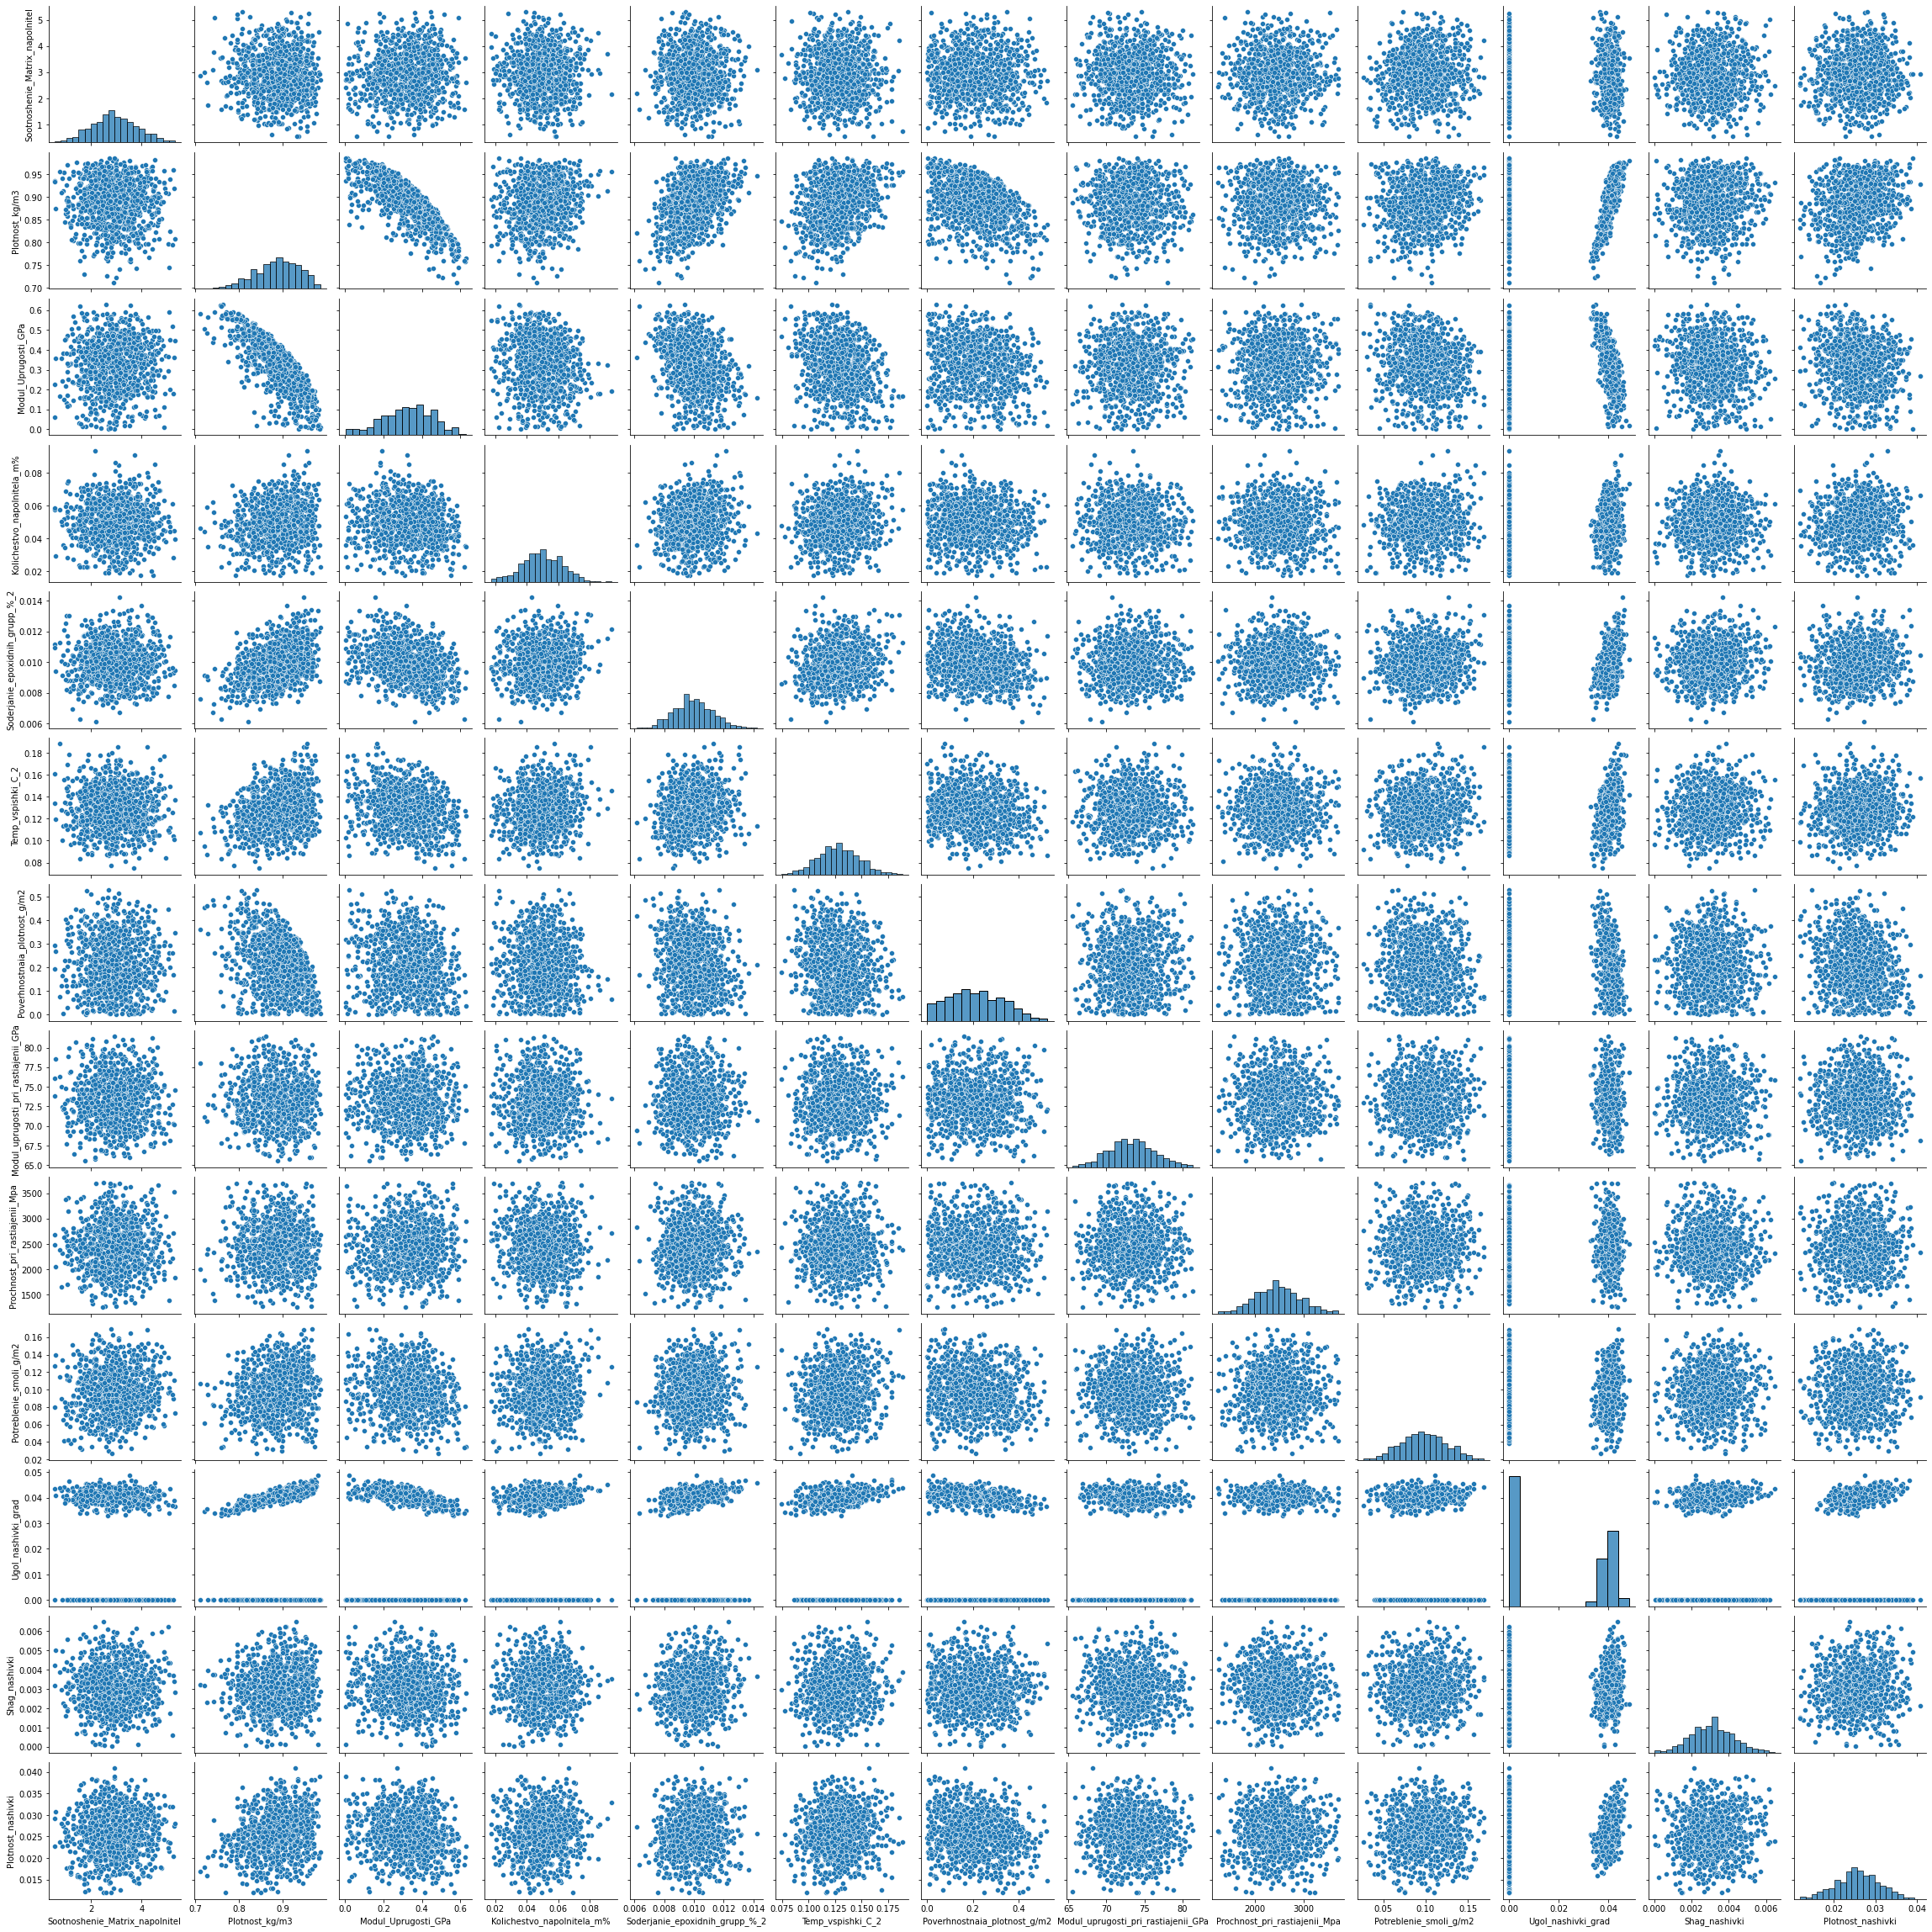

In [101]:
sns.pairplot(dfpm)
plt.savefig('matrix2-norm.png')


In [103]:
dfpm.corr(method ='kendall')

Sootnoshenie_Matrix_napolnitel  \
Sootnoshenie_Matrix_napolnitel                             1.000000   
Plotnost_kg/m3                                            -0.014489   
Modul_Uprugosti_GPa                                        0.029979   
Kolichestvo_napolnitela_m%                                 0.000283   
Soderjanie_epoxidnih_grupp_%_2                            -0.001527   
Temp_vspishki_C_2                                         -0.008511   
Poverhnostnaia_plotnost_g/m2                               0.003752   
Modul_uprugosti_pri_rastiajenii_GPa                       -0.011535   
Prochnost_pri_rastiajenii_Mpa                              0.012691   
Potreblenie_smoli_g/m2                                     0.032506   
Ugol_nashivki_grad                                        -0.034898   
Shag_nashivki                                              0.021189   
Plotnost_nashivki                                          0.021075   

                                     Plotnost_kg/m3  Modul_Uprugosti_GPa  \
Sootnoshenie_Matrix_napolnitel            -0.014489             0.029979   
Plotnost_kg/m3                             1.000000            -0.609534   
Modul_Uprugosti_GPa                       -0.609534             1.000000   
Kolichestvo_napolnitela_m%                 0.103044            -0.089031   
Soderjanie_epoxidnih_grupp_%_2             0.285470            -0.224114   
Temp_vspishki_C_2                          0.172055            -0.165163   
Poverhnostnaia_plotnost_g/m2              -0.285749            -0.098400   
Modul_uprugosti_pri_rastiajenii_GPa       -0.021485             0.009802   
Prochnost_pri_rastiajenii_Mpa             -0.023323             0.029228   
Potreblenie_smoli_g/m2                     0.103391            -0.095594   
Ugol_nashivki_grad                         0.183461            -0.159279   
Shag_nashivki                              0.070515            -0.072161   
Plotnost_nashivki                          0.155354            -0.085534   

                                     Kolichestvo_napolnitela_m%  \
Sootnoshenie_Matrix_napolnitel                         0.000283   
Plotnost_kg/m3                                         0.103044   
Modul_Uprugosti_GPa                                   -0.089031   
Kolichestvo_napolnitela_m%                             1.000000   
Soderjanie_epoxidnih_grupp_%_2                         0.089149   
Temp_vspishki_C_2                                      0.106646   
Poverhnostnaia_plotnost_g/m2                          -0.037323   
Modul_uprugosti_pri_rastiajenii_GPa                   -0.031408   
Prochnost_pri_rastiajenii_Mpa                         -0.026956   
Potreblenie_smoli_g/m2                                 0.015366   
Ugol_nashivki_grad                                     0.056427   
Shag_nashivki                                          0.012080   
Plotnost_nashivki                                      0.050080   

                                     Soderjanie_epoxidnih_grupp_%_2  \
Sootnoshenie_Matrix_napolnitel                            -0.001527   
Plotnost_kg/m3                                             0.285470   
Modul_Uprugosti_GPa                                       -0.224114   
Kolichestvo_napolnitela_m%                                 0.089149   
Soderjanie_epoxidnih_grupp_%_2                             1.000000   
Temp_vspishki_C_2                                          0.115088   
Poverhnostnaia_plotnost_g/m2                              -0.131692   
Modul_uprugosti_pri_rastiajenii_GPa                        0.027679   
Prochnost_pri_rastiajenii_Mpa                              0.010273   
Potreblenie_smoli_g/m2                                     0.084597   
Ugol_nashivki_grad                                         0.107492   
Shag_nashivki                                              0.050350   
Plotnost_nashivki                                          0.076832   

                                     Temp_v

In [104]:
dfpm.corr(method ='pearson')

Sootnoshenie_Matrix_napolnitel  \
Sootnoshenie_Matrix_napolnitel                             1.000000   
Plotnost_kg/m3                                            -0.027400   
Modul_Uprugosti_GPa                                        0.046410   
Kolichestvo_napolnitela_m%                                 0.001987   
Soderjanie_epoxidnih_grupp_%_2                             0.011476   
Temp_vspishki_C_2                                         -0.020247   
Poverhnostnaia_plotnost_g/m2                               0.003228   
Modul_uprugosti_pri_rastiajenii_GPa                       -0.019248   
Prochnost_pri_rastiajenii_Mpa                              0.024488   
Potreblenie_smoli_g/m2                                     0.065472   
Ugol_nashivki_grad                                        -0.040811   
Shag_nashivki                                              0.032828   
Plotnost_nashivki                                          0.039169   

                                     Plotnost_kg/m3  Modul_Uprugosti_GPa  \
Sootnoshenie_Matrix_napolnitel            -0.027400             0.046410   
Plotnost_kg/m3                             1.000000            -0.774505   
Modul_Uprugosti_GPa                       -0.774505             1.000000   
Kolichestvo_napolnitela_m%                 0.157045            -0.126213   
Soderjanie_epoxidnih_grupp_%_2             0.436905            -0.334007   
Temp_vspishki_C_2                          0.282937            -0.257201   
Poverhnostnaia_plotnost_g/m2              -0.418594            -0.154297   
Modul_uprugosti_pri_rastiajenii_GPa       -0.031753             0.019173   
Prochnost_pri_rastiajenii_Mpa             -0.026208             0.049142   
Potreblenie_smoli_g/m2                     0.154612            -0.146076   
Ugol_nashivki_grad                         0.043142            -0.066701   
Shag_nashivki                              0.101084            -0.106500   
Plotnost_nashivki                          0.243894            -0.128769   

                                     Kolichestvo_napolnitela_m%  \
Sootnoshenie_Matrix_napolnitel                         0.001987   
Plotnost_kg/m3                                         0.157045   
Modul_Uprugosti_GPa                                   -0.126213   
Kolichestvo_napolnitela_m%                             1.000000   
Soderjanie_epoxidnih_grupp_%_2                         0.133940   
Temp_vspishki_C_2                                      0.153929   
Poverhnostnaia_plotnost_g/m2                          -0.059475   
Modul_uprugosti_pri_rastiajenii_GPa                   -0.052440   
Prochnost_pri_rastiajenii_Mpa                         -0.049089   
Potreblenie_smoli_g/m2                                 0.049231   
Ugol_nashivki_grad                                     0.042405   
Shag_nashivki                                          0.014796   
Plotnost_nashivki                                      0.059514   

                                     Soderjanie_epoxidnih_grupp_%_2  \
Sootnoshenie_Matrix_napolnitel                             0.011476   
Plotnost_kg/m3                                             0.436905   
Modul_Uprugosti_GPa                                       -0.334007   
Kolichestvo_napolnitela_m%                                 0.133940   
Soderjanie_epoxidnih_grupp_%_2                             1.000000   
Temp_vspishki_C_2                                          0.178265   
Poverhnostnaia_plotnost_g/m2                              -0.198083   
Modul_uprugosti_pri_rastiajenii_GPa                        0.038619   
Prochnost_pri_rastiajenii_Mpa                              0.004726   
Potreblenie_smoli_g/m2                                     0.115751   
Ugol_nashivki_grad                                         0.060353   
Shag_nashivki                                              0.087800   
Plotnost_nashivki                                          0.101863   

                                     Temp_v

In [105]:
#Входные и выходные данные
inputcol = ['Plotnost_kg/m3', 'Modul_Uprugosti_GPa', 'Kolichestvo_napolnitela_m%', 'Soderjanie_epoxidnih_grupp_%_2', 
            'Temp_vspishki_C_2', 'Poverhnostnaia_plotnost_g/m2', 'Potreblenie_smoli_g/m2', 'Ugol_nashivki_grad', 
            'Shag_nashivki', 'Plotnost_nashivki']
result = ['Sootnoshenie_Matrix_napolnitel']
X_train = dfpm[inputcol]
y_train = dfpm[result]

In [106]:
#Разбиваем на тренировочную и тестовую выборку
Xtrn, Xtest, Ytrn, Ytest = train_test_split(X_train, y_train, test_size=0.3)

In [107]:
print(Xtest)

     Plotnost_kg/m3  Modul_Uprugosti_GPa  Kolichestvo_napolnitela_m%  \
549        0.826240             0.472962                    0.030510   
805        0.809131             0.456403                    0.036346   
451        0.769303             0.568131                    0.041929   
302        0.942554             0.279783                    0.061954   
758        0.863625             0.453325                    0.059620   
..              ...                  ...                         ...   
338        0.855938             0.448941                    0.031173   
775        0.873839             0.434502                    0.060410   
648        0.950290             0.238412                    0.061227   
48         0.873490             0.398922                    0.057863   
862        0.959632             0.037829                    0.057126   

     Soderjanie_epoxidnih_grupp_%_2  Temp_vspishki_C_2  \
549                        0.007752           0.119952   
805                

In [108]:
Ytest

Sootnoshenie_Matrix_napolnitel
549                        2.830374
805                        3.499959
451                        2.798557
302                        2.890203
758                        0.986746
..                              ...
338                        2.958672
775                        3.042055
648                        2.319322
48                         1.301025
862                        2.978943

[281 rows x 1 columns]

In [111]:
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
#from scikeras.wrappers import KerasClassifier
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout

from numpy.random import seed
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
import joblib


In [240]:
def create_model(lyrs=[8], act='softmax', opt='SGD', dr=0.2):
    
    seed = 42
    np.random.seed(seed)
    tf.random.set_seed(seed)
    
    model = Sequential()
    model.add(Dense(lyrs[0], input_dim=X_train.shape[1], activation=act)) 
    for i in range(1,len(lyrs)):
        model.add(Dense(lyrs[i], activation=act))
    
    model.add(Dropout(dr))
    model.add(Dense(1, activation='linear'))  # output layer
    
    model.compile(loss='mse', optimizer=opt, metrics=['mae', 'accuracy'])
 
    return model

In [231]:
# create model
model = KerasClassifier(build_fn=create_model, verbose=0)

# define the grid search parameters
batch_size = [4, 10, 20, 50, 100]
epochs = [10, 50, 100, 200, 300]
param_grid = dict(batch_size=batch_size, epochs=epochs)

# search the grid
grid = GridSearchCV(estimator=model, 
                    param_grid=param_grid,
                    cv=4,
                    verbose=1, n_jobs=-1)

grid_result = grid.fit(X_train, y_train)

Fitting 4 folds for each of 25 candidates, totalling 100 fits


In [232]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.004274 using {'batch_size': 4, 'epochs': 10}
0.004274 (0.005234) with: {'batch_size': 4, 'epochs': 10}
0.004274 (0.005234) with: {'batch_size': 4, 'epochs': 50}
0.004274 (0.005234) with: {'batch_size': 4, 'epochs': 100}
0.004274 (0.005234) with: {'batch_size': 4, 'epochs': 200}
0.004274 (0.005234) with: {'batch_size': 4, 'epochs': 300}
0.004274 (0.005234) with: {'batch_size': 10, 'epochs': 10}
0.004274 (0.005234) with: {'batch_size': 10, 'epochs': 50}
0.004274 (0.005234) with: {'batch_size': 10, 'epochs': 100}
0.004274 (0.005234) with: {'batch_size': 10, 'epochs': 200}
0.004274 (0.005234) with: {'batch_size': 10, 'epochs': 300}
0.004274 (0.005234) with: {'batch_size': 20, 'epochs': 10}
0.004274 (0.005234) with: {'batch_size': 20, 'epochs': 50}
0.004274 (0.005234) with: {'batch_size': 20, 'epochs': 100}
0.004274 (0.005234) with: {'batch_size': 20, 'epochs': 200}
0.004274 (0.005234) with: {'batch_size': 20, 'epochs': 300}
0.004274 (0.005234) with: {'batch_size': 50, 'epochs': 10}

In [233]:
# create model
model = KerasClassifier(build_fn=create_model, epochs=10, batch_size=4, verbose=0)

# define the grid search parameters
optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Nadam']
param_grid = dict(opt=optimizer)

# search the grid
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=4, verbose=2)
grid_result = grid.fit(X_train, y_train)

Fitting 4 folds for each of 6 candidates, totalling 24 fits
[CV] END ............................................opt=SGD; total time=   2.4s
[CV] END ............................................opt=SGD; total time=   1.5s
[CV] END ............................................opt=SGD; total time=   2.0s
[CV] END ............................................opt=SGD; total time=   1.8s
[CV] END ........................................opt=RMSprop; total time=   1.9s
[CV] END ........................................opt=RMSprop; total time=   2.1s
[CV] END ........................................opt=RMSprop; total time=   2.2s
[CV] END ........................................opt=RMSprop; total time=   2.2s
[CV] END ........................................opt=Adagrad; total time=   1.9s
[CV] END ........................................opt=Adagrad; total time=   1.3s
[CV] END ........................................opt=Adagrad; total time=   1.7s
[CV] END ........................................

In [234]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.004274 using {'opt': 'SGD'}
0.004274 (0.005234) with: {'opt': 'SGD'}
0.004274 (0.005234) with: {'opt': 'RMSprop'}
0.004274 (0.005234) with: {'opt': 'Adagrad'}
0.004274 (0.005234) with: {'opt': 'Adadelta'}
0.004274 (0.005234) with: {'opt': 'Adam'}
0.004274 (0.005234) with: {'opt': 'Nadam'}


In [236]:
# create model
model = KerasClassifier(build_fn=create_model, epochs=10, batch_size=4, verbose=0)

# define the grid search parameters
layers = [[8],[16, 4],[32, 8, 3],[12, 6, 3], [64, 64, 3], [128, 64, 16, 3]]
param_grid = dict(lyrs=layers)

# search the grid
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=4, verbose=2)
grid_result = grid.fit(X_train, y_train)

Fitting 4 folds for each of 6 candidates, totalling 24 fits
[CV] END ...........................................lyrs=[8]; total time=   1.5s
[CV] END ...........................................lyrs=[8]; total time=   1.5s
[CV] END ...........................................lyrs=[8]; total time=   1.3s
[CV] END ...........................................lyrs=[8]; total time=   1.3s
[CV] END .......................................lyrs=[16, 4]; total time=   1.3s
[CV] END .......................................lyrs=[16, 4]; total time=   1.2s
[CV] END .......................................lyrs=[16, 4]; total time=   1.2s
[CV] END .......................................lyrs=[16, 4]; total time=   1.7s
[CV] END ....................................lyrs=[32, 8, 3]; total time=   1.4s
[CV] END ....................................lyrs=[32, 8, 3]; total time=   1.3s
[CV] END ....................................lyrs=[32, 8, 3]; total time=   1.3s
[CV] END ....................................lyrs

In [237]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.004274 using {'lyrs': [8]}
0.004274 (0.005234) with: {'lyrs': [8]}
0.004274 (0.005234) with: {'lyrs': [16, 4]}
0.004274 (0.005234) with: {'lyrs': [32, 8, 3]}
0.004274 (0.005234) with: {'lyrs': [12, 6, 3]}
0.002137 (0.002137) with: {'lyrs': [64, 64, 3]}
0.001068 (0.001850) with: {'lyrs': [128, 64, 16, 3]}


In [238]:
model = KerasClassifier(build_fn=create_model, epochs=10, batch_size=4, verbose=0)
# define the grid search parameters
activation = ['softmax', 'softplus', 'softsign', 'relu', 'tanh', 'sigmoid', 'hard_sigmoid', 'linear']
param_grid = dict(act=activation)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=4)
grid_result = grid.fit(X_train, y_train)

In [239]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.004274 using {'act': 'softmax'}
0.004274 (0.005234) with: {'act': 'softmax'}
0.004274 (0.005234) with: {'act': 'softplus'}
0.004274 (0.005234) with: {'act': 'softsign'}
0.004274 (0.005234) with: {'act': 'relu'}
0.004274 (0.005234) with: {'act': 'tanh'}
0.004274 (0.005234) with: {'act': 'sigmoid'}
0.004274 (0.005234) with: {'act': 'hard_sigmoid'}
0.001068 (0.001850) with: {'act': 'linear'}


In [241]:
# create model
model = KerasClassifier(build_fn=create_model, epochs=10, batch_size=4, verbose=0)

# define the grid search parameters
drops = [0.0, 0.01, 0.05, 0.1, 0.2, 0.3, 0.5]
param_grid = dict(dr=drops)
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=4, verbose=2)
grid_result = grid.fit(X_train, y_train)

Fitting 4 folds for each of 7 candidates, totalling 28 fits
[CV] END .............................................dr=0.0; total time=   1.8s
[CV] END .............................................dr=0.0; total time=   1.3s
[CV] END .............................................dr=0.0; total time=   1.4s
[CV] END .............................................dr=0.0; total time=   1.6s
[CV] END ............................................dr=0.01; total time=   1.6s
[CV] END ............................................dr=0.01; total time=   1.6s
[CV] END ............................................dr=0.01; total time=   1.2s
[CV] END ............................................dr=0.01; total time=   1.2s
[CV] END ............................................dr=0.05; total time=   1.3s
[CV] END ............................................dr=0.05; total time=   1.2s
[CV] END ............................................dr=0.05; total time=   1.5s
[CV] END ........................................

In [242]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.004274 using {'dr': 0.0}
0.004274 (0.005234) with: {'dr': 0.0}
0.004274 (0.005234) with: {'dr': 0.01}
0.004274 (0.005234) with: {'dr': 0.05}
0.004274 (0.005234) with: {'dr': 0.1}
0.004274 (0.005234) with: {'dr': 0.2}
0.004274 (0.005234) with: {'dr': 0.3}
0.004274 (0.005234) with: {'dr': 0.5}


In [263]:
# create final model
model = create_model(lyrs=[64, 128, 256, 512, 1024, 512, 256, 256, 128, 64, 16, 4], dr=0.1)

print(model.summary())

Model: "sequential_187"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_540 (Dense)            (None, 64)                704       
_________________________________________________________________
dense_541 (Dense)            (None, 128)               8320      
_________________________________________________________________
dense_542 (Dense)            (None, 256)               33024     
_________________________________________________________________
dense_543 (Dense)            (None, 512)               131584    
_________________________________________________________________
dense_544 (Dense)            (None, 1024)              525312    
_________________________________________________________________
dense_545 (Dense)            (None, 512)               524800    
_________________________________________________________________
dense_546 (Dense)            (None, 256)            

In [264]:
# train model on full train set, with 80/20 CV split
training = model.fit(Xtrn, Ytrn, epochs=100, batch_size=4, 
                     validation_split=0.2, verbose=1)


Epoch 1/100
131/131 [==============================] - 1s 6ms/step - loss: 2.2399 - mae: 1.1740 - accuracy: 0.0000e+00 - val_loss: 0.8115 - val_mae: 0.7124 - val_accuracy: 0.0000e+00
Epoch 2/100
131/131 [==============================] - 1s 5ms/step - loss: 0.7531 - mae: 0.6977 - accuracy: 0.0000e+00 - val_loss: 0.8076 - val_mae: 0.7140 - val_accuracy: 0.0000e+00
Epoch 3/100
131/131 [==============================] - 1s 5ms/step - loss: 0.7547 - mae: 0.6984 - accuracy: 0.0000e+00 - val_loss: 0.8131 - val_mae: 0.7194 - val_accuracy: 0.0000e+00
Epoch 4/100
131/131 [==============================] - 1s 5ms/step - loss: 0.7201 - mae: 0.6933 - accuracy: 0.0000e+00 - val_loss: 0.8089 - val_mae: 0.7158 - val_accuracy: 0.0000e+00
Epoch 5/100
131/131 [==============================] - 1s 5ms/step - loss: 0.7644 - mae: 0.7059 - accuracy: 0.0000e+00 - val_loss: 0.8073 - val_mae: 0.7132 - val_accuracy: 0.0000e+00
Epoch 6/100
131/131 [==============================] - 1s 6ms/step - loss: 0.7448 - m

131/131 [==============================] - 1s 6ms/step - loss: 0.7191 - mae: 0.6880 - accuracy: 0.0000e+00 - val_loss: 0.8074 - val_mae: 0.7136 - val_accuracy: 0.0000e+00
Epoch 46/100
131/131 [==============================] - 1s 6ms/step - loss: 0.7168 - mae: 0.6821 - accuracy: 0.0000e+00 - val_loss: 0.8216 - val_mae: 0.7253 - val_accuracy: 0.0000e+00
Epoch 47/100
131/131 [==============================] - 1s 5ms/step - loss: 0.7193 - mae: 0.6882 - accuracy: 0.0000e+00 - val_loss: 0.8079 - val_mae: 0.7145 - val_accuracy: 0.0000e+00
Epoch 48/100
131/131 [==============================] - 1s 5ms/step - loss: 0.7186 - mae: 0.6842 - accuracy: 0.0000e+00 - val_loss: 0.8099 - val_mae: 0.7167 - val_accuracy: 0.0000e+00
Epoch 49/100
131/131 [==============================] - 1s 5ms/step - loss: 0.7185 - mae: 0.6859 - accuracy: 0.0000e+00 - val_loss: 0.8109 - val_mae: 0.7176 - val_accuracy: 0.0000e+00
Epoch 50/100
131/131 [==============================] - 1s 5ms/step - loss: 0.7164 - mae: 0.6

131/131 [==============================] - 1s 5ms/step - loss: 0.7164 - mae: 0.6831 - accuracy: 0.0000e+00 - val_loss: 0.8196 - val_mae: 0.7241 - val_accuracy: 0.0000e+00
Epoch 90/100
131/131 [==============================] - 1s 5ms/step - loss: 0.7150 - mae: 0.6842 - accuracy: 0.0000e+00 - val_loss: 0.8086 - val_mae: 0.7154 - val_accuracy: 0.0000e+00
Epoch 91/100
131/131 [==============================] - 1s 5ms/step - loss: 0.7149 - mae: 0.6862 - accuracy: 0.0000e+00 - val_loss: 0.8101 - val_mae: 0.7169 - val_accuracy: 0.0000e+00
Epoch 92/100
131/131 [==============================] - 1s 5ms/step - loss: 0.7141 - mae: 0.6828 - accuracy: 0.0000e+00 - val_loss: 0.8105 - val_mae: 0.7173 - val_accuracy: 0.0000e+00
Epoch 93/100
131/131 [==============================] - 1s 5ms/step - loss: 0.7169 - mae: 0.6848 - accuracy: 0.0000e+00 - val_loss: 0.8113 - val_mae: 0.7179 - val_accuracy: 0.0000e+00
Epoch 94/100
131/131 [==============================] - 1s 5ms/step - loss: 0.7160 - mae: 0.6

In [260]:
# evaluate the model
scores = model.evaluate(Xtest, Ytest)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

9/9 [==============================] - 0s 5ms/step - loss: 0.9580 - mae: 0.7851 - accuracy: 0.0000e+00

mae: 78.51%


In [188]:
#Ввод данных пользователем dfuser
#dfuser = dfp.copy(deep = True)
#dfuser = dfuser.reset_index()
#dfuser = dfuser.drop(labels=range(1, 936), axis=0)
#dfuser.drop(['index'], inplace=True, axis=1)

dfuser = pd.DataFrame({'Plotnost_kg/m3' : [0.0], 
            'Modul_Uprugosti_GPa' : [0.0], 'Kolichestvo_napolnitela_m%' : [0.0], 
            'Soderjanie_epoxidnih_grupp_%_2' : [0.0], 'Temp_vspishki_C_2' : [0.0], 
            'Poverhnostnaia_plotnost_g/m2' : [0.0], 'Potreblenie_smoli_g/m2' : [0.0], 
            'Ugol_nashivki_grad' : [0.0], 'Shag_nashivki' : [0.0], 'Plotnost_nashivki' : [0.0]})
col = dfuser.columns

print('Введите параметры:') 
a = 0 
for i in column: 
    print(col[a]) 
    y = input() 
    dfuser[col[a]].values[0] = float(y) 
    a+=1
    if a == 10:
        break
    

Введите параметры:
Plotnost_kg/m3
1861.33
Modul_Uprugosti_GPa
542
Kolichestvo_napolnitela_m%
120
Soderjanie_epoxidnih_grupp_%_2
22
Temp_vspishki_C_2
261
Poverhnostnaia_plotnost_g/m2
445
Potreblenie_smoli_g/m2
202
Ugol_nashivki_grad
0
Shag_nashivki
1.41
Plotnost_nashivki
62.85


In [226]:
dfuser

Plotnost_kg/m3  Modul_Uprugosti_GPa  Kolichestvo_napolnitela_m%  \
0         1861.33                542.0                       120.0   

   Soderjanie_epoxidnih_grupp_%_2  Temp_vspishki_C_2  \
0                            22.0              261.0   

   Poverhnostnaia_plotnost_g/m2  Potreblenie_smoli_g/m2  Ugol_nashivki_grad  \
0                         445.0                   202.0                 0.0   

   Shag_nashivki  Plotnost_nashivki  
0           1.41              62.85

In [227]:
#Нормализация

modified = scaler.transform(dfuser)
dfuser_modified = pd.DataFrame(modified, columns = col)
dfuser_modified

Plotnost_kg/m3  Modul_Uprugosti_GPa  Kolichestvo_napolnitela_m%  \
0        0.921033             0.268195                    0.059379   

   Soderjanie_epoxidnih_grupp_%_2  Temp_vspishki_C_2  \
0                        0.010886           0.129149   

   Poverhnostnaia_plotnost_g/m2  Potreblenie_smoli_g/m2  Ugol_nashivki_grad  \
0                      0.220197                0.099955                 0.0   

   Shag_nashivki  Plotnost_nashivki  
0       0.000698             0.0311

In [228]:
pred = model.predict(dfuser_modified)

In [229]:
print(pred)

[[2.9430897]]


In [ ]:
pred[0][0]

In [ ]:
pred_inversed = pd.DataFrame([])
pred_inversed.at[0,0] = float(pred[0][0])

for i in range(1, 13):
    p = 0
    pred_inversed.at[0,i] = float(p)
pred_inversed.at[0,7] = float(pred[0][1])
pred_inversed.at[0,8] = float(pred[0][2])
pred_inversed

In [ ]:
#Возвращает предсказанное значание (в размерности до нормализации)
Y_trans = scaler.inverse_transform(pred_inversed)

print(Y_trans[0,0], Y_trans[0,7], Y_trans[0,8])

In [ ]:
normalized_d = pred[0][0]

In [ ]:
denormalized_d = normalized_d * (3705.672523 - 0) + 0

In [ ]:
denormalized_d

In [ ]:
model.save('models/VKR_mlp_var1-Norm')

In [ ]:
# save the scaler
joblib.dump(scaler, open('scaler-Norm.pkl', 'wb'))

In [ ]:
print(keras.__version__)

In [ ]:
print(tf.__version__)

In [ ]:
from platform import python_version
print(python_version())